In [28]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [29]:
# Reading in data from CSV
df = pd.read_csv("data/cfb_attendance_DM.csv", encoding="cp1252")

In [30]:
#ascertain current data types
df.dtypes

Date                 object
Team                 object
Time                 object
Opponent             object
Rank                 object
Site                 object
TV                   object
Result               object
Results              object
Home Score            int64
Away Score            int64
Attendance          float64
Current Wins         object
Current Losses       object
Stadium Capacity      int64
Fill Rate           float64
New Coach            object
Tailgating           object
PRCP                float64
SNOW                 object
SNWD                 object
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                float64
Month               float64
Day                 float64
dtype: object

In [31]:
# Change column datatypes
df['Date'] = df['Date'].astype('datetime64')
df['Opponent'] = df['Opponent'].astype('string')
df['Site'] = df['Site'].astype('string')
df['TV'] = df['TV'].astype('string')
df['Home Score'] = df['Home Score'].astype('int32')
df['Away Score'] = df['Away Score'].astype('int32')

#converted time to military and dropped minutes so that it could be more easily sorted just by hour
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.strftime('%H')

df.dtypes

Date                datetime64[ns]
Team                        object
Time                        object
Opponent                    string
Rank                        object
Site                        string
TV                          string
Result                      object
Results                     object
Home Score                   int32
Away Score                   int32
Attendance                 float64
Current Wins                object
Current Losses              object
Stadium Capacity             int64
Fill Rate                  float64
New Coach                   object
Tailgating                  object
PRCP                       float64
SNOW                        object
SNWD                        object
TMAX                         int64
TMIN                         int64
Opponent_Rank               object
Conference                  object
Year                       float64
Month                      float64
Day                        float64
dtype: object

In [32]:
#preview data
df.head()

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Results,Home Score,...,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,2000-09-02,Arkansas,20,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38–0,W,38,...,0.00,0,0,105,65,NR,SEC,2000.0,9.0,2.0
1,2000-09-16,Arkansas,18,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 38–31,W,38,...,0.00,0,0,79,44,NR,SEC,2000.0,9.0,16.0
2,2000-09-23,Arkansas,20,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 28–21,W,28,...,2.12,0,0,85,63,NR,SEC,2000.0,9.0,23.0
3,2000-09-30,Arkansas,11,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 7–38,L,7,...,0.00,0,0,77,45,25,SEC,2000.0,9.0,30.0
4,2000-10-07,Arkansas,18,Louisiana–Monroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 52–6,W,52,...,0.00,0,0,50,28,NR,SEC,2000.0,10.0,7.0


In [4]:
#determine total score
total_score = df['Home Score'] + df['Away Score']
df['Total Score'] = total_score
df['Total Score']

0       38
1       69
2       49
3       45
4       58
        ..
6667    47
6668    51
6669    19
6670    80
6671    46
Name: Total Score, Length: 6672, dtype: int32

In [34]:
#determine how many games fall into each hour
df['Time'].value_counts()

18    1216
19    1023
12     881
15     784
14     770
13     637
11     569
20     284
16     282
17     213
21       7
10       6
Name: Time, dtype: int64

In [6]:
#determine total number of times we're working with
df['Time'].nunique()

12

In [7]:
#format pyplot plots nicely
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [8]:
#gather summary statistics of time and total score
summary_df = df.groupby(['Time'])['Total Score'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

,mean,median,var,std,sem
Time,,,,,
10,48.500000,46.5,289.100000,17.002941,6.941422
11,55.282953,55.0,341.023670,18.466826,0.774170
12,52.393871,52.0,291.673099,17.078440,0.575387
13,53.653061,53.0,327.371583,18.093413,0.716887
14,55.005195,54.0,324.954459,18.026493,0.649630
15,54.201531,53.0,334.403778,18.286710,0.653097
16,55.851064,55.0,332.155675,18.225139,1.085291
17,55.183099,54.0,334.631411,18.292933,1.253411
18,55.763980,55.0,327.350833,18.092839,0.518848


In [9]:
#create a dataframe for plotting the data by average
plot_df = df.groupby(['Time']).mean()
plot_df.index = plot_df.index.astype('int64')
plot_df['Total Score'] = plot_df['Total Score'].astype('int64')

plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 10 to 21
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Home Score        12 non-null     float64
 1   Away Score        12 non-null     float64
 2   Attendance        12 non-null     float64
 3   Stadium Capacity  12 non-null     float64
 4   Fill Rate         12 non-null     float64
 5   PRCP              12 non-null     float64
 6   TMAX              12 non-null     float64
 7   TMIN              12 non-null     float64
 8   Year              12 non-null     float64
 9   Month             12 non-null     float64
 10  Day               12 non-null     float64
 11  Total Score       12 non-null     int64  
dtypes: float64(11), int64(1)
memory usage: 1.2 KB


The correlation coefficient between time and average total score is 0.6
The linear regression model is: y = 0.46x + 46.85


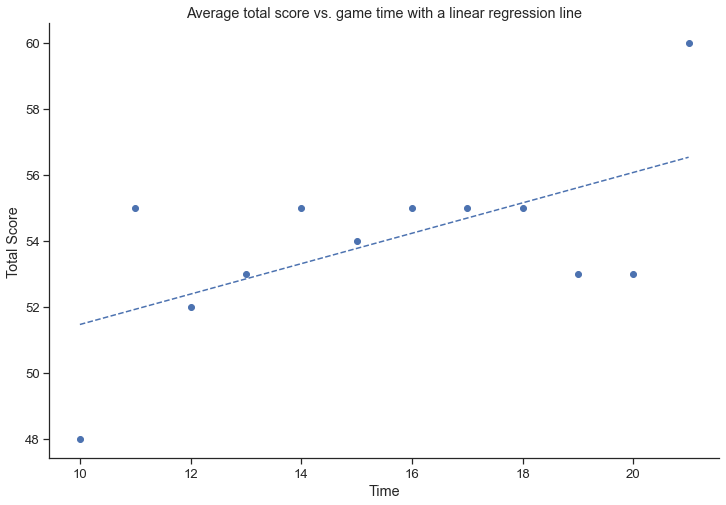

In [10]:
#create linear regression line
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(plot_df.index, plot_df['Total Score']);
vc_fit = vc_slope * plot_df.index + vc_int
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(plot_df.index, plot_df['Total Score']);
regress_values = plot_df.index * slope + intercept

plt.plot(plot_df.index,vc_fit,"--");

#create scatter plot
x_axis = plot_df.index
y_axis = plot_df['Total Score']
plt.scatter(x_axis, y_axis)
plt.ylabel('Total Score')
plt.xlabel('Time')
plt.title("Average total score vs. game time with a linear regression line");

print(f"The correlation coefficient between time and average total score is {round(st.pearsonr(plot_df.index, plot_df['Total Score'])[0],2)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2));
print(f"The linear regression model is: {line_eq}")

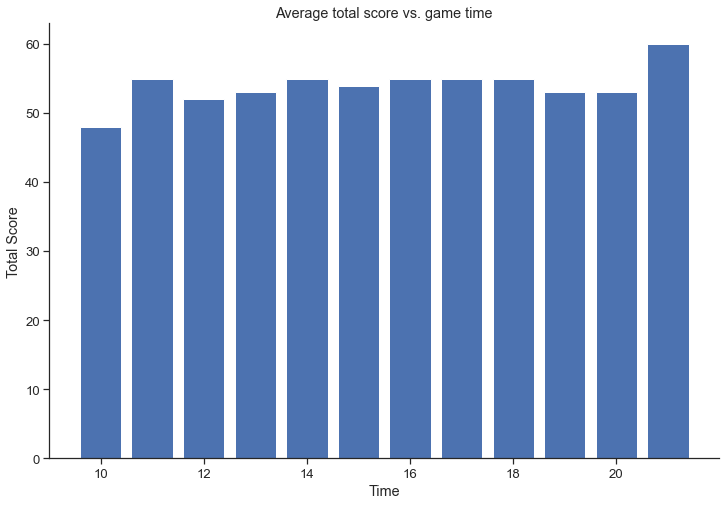

In [40]:
#create bar plot
x_axis = plot_df.index
y_axis = plot_df['Total Score']
plt.bar(x_axis, y_axis)
plt.ylabel('Total Score')
plt.xlabel('Time')
plt.title("Average total score vs. game time");